In [ ]:
from tensorflow.python.client import device_lib
import os
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir='/content/drive/MyDrive/Colab Notebooks/TRAIN'
test_dir='/content/drive/MyDrive/Colab Notebooks/TEST'

In [ ]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of GSL_H ...
Obtaining images of GSL_J ...
Obtaining images of GSL_K ...
Obtaining images of GSL_L ...
Obtaining images of GSL_M ...
Obtaining images of GSL_N ...
Obtaining images of GSL_O ...
Obtaining images of GSL_P ...
Obtaining images of GSL_Q ...
Obtaining images of GSL_R ...
Obtaining images of GSL_I ...
Obtaining images of GSL_S ...
Obtaining images of GSL_T ...
Obtaining images of GSL_U ...
Obtaining images of GSL_V ...
Obtaining images of GSL_W ...
Obtaining images of GSL_X ...
Obtaining images of GSL_Y ...
Obtaining images of GSL_Z ...
Obtaining images of ISL_A ...
Obtaining images of ISL_B ...
Obtaining images of ISL_C ...
Obtaining images of ISL_D ...
Obtaining images of ISL_E ...
Obtaining images of ISL_F ...
Obtaining images of ISL_G ...
Obtaining images of ISL_H ...
Obtaining images of ISL_I ...
Obtaining images of ISL_J ...
Obtaining images of ISL_K ...
Obtaining images of ISL_L ...
Obtaining images of ISL_M ...
Obtaining images of ISL_N ...
Obtaining 

In [ ]:
print(len(X), len(y))

808 808


In [ ]:
classes = ['ASL_A', 'GSL_A', 'ISL_A', 'ASL_B', 'GSL_B', 'ISL_B','ASL_C', 'GSL_C', 'ISL_C','ASL_D', 'GSL_D', 'ISL_D','ASL_E', 'GSL_E', 'ISL_E','ASL_F', 'GSL_F', 'ISL_F','ASL_G', 'GSL_G', 'ISL_G', 'ASL_H', 'GSL_H', 'ISL_H','ASL_I', 'GSL_I', 'ISL_I','ASL_J', 'GSL_J', 'ISL_J','ASL_K', 'GSL_K', 'ISL_K','ASL_L', 'GSL_L', 'ISL_L','ASL_M', 'GSL_M', 'ISL_M', 'ASL_N', 'GSL_N', 'ISL_N','ASL_O', 'GSL_O', 'ISL_O','ASL_P', 'GSL_P', 'ISL_P','ASL_Q', 'GSL_Q', 'ISL_Q','ASL_R', 'GSL_R', 'ISL_R','ASL_S', 'GSL_S', 'ISL_S', 'ASL_T', 'GSL_T', 'ISL_T','ASL_U', 'GSL_U', 'ISL_U','ASL_V', 'GSL_V', 'ISL_V','ASL_W', 'GSL_W', 'ISL_W','ASL_X','GSL_X', 'ISL_X','ASL_Y', 'GSL_Y', 'ISL_Y', 'ASL_Z', 'GSL_Z', 'ISL_Z']
letters=['A','B','C','D','E','F']

<Figure size 432x288 with 0 Axes>

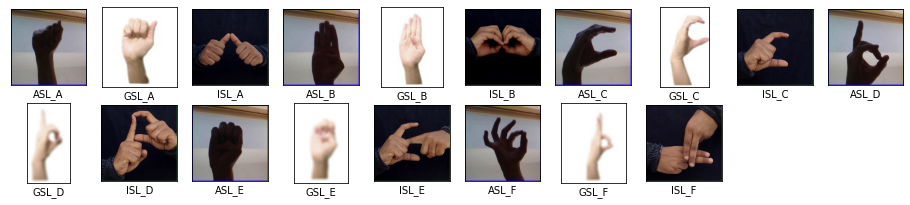

In [ ]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,18):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        temp=classes[i].split('_')
        path = train_dir + "/{0}/{1}1.jpg".format(classes[i],temp[1])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [ ]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test, normalised_X

x_train, x_test, y_train, y_test, N_aa = preprocess_data(X, y)

In [ ]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (727, 32, 32, 3)
Test data: (81, 32, 32, 3)


In [ ]:
classesA = 78
batch = 64
epochs = 100
learning_rate = 0.001

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classesA, activation='softmax'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

train_generator = data_generator.flow_from_directory(train_dir, target_size=(32, 32), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=32, subset="training")

validation_generator = data_generator.flow_from_directory(train_dir, target_size=(32, 32), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=32, subset="validation")

Found 731 images belonging to 78 classes.
Found 77 images belonging to 78 classes.


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/100
10/10 [==============================] - 6s 555ms/step - loss: 3.7013 - accuracy: 0.3735 - val_loss: 4.3165 - val_accuracy: 0.0342
Epoch 2/100
10/10 [==============================] - 5s 514ms/step - loss: 0.8451 - accuracy: 0.7814 - val_loss: 4.3709 - val_accuracy: 0.0342
Epoch 3/100
10/10 [==============================] - 5s 505ms/step - loss: 0.3090 - accuracy: 0.8985 - val_loss: 4.7944 - val_accuracy: 0.0342
Epoch 4/100
10/10 [==============================] - 5s 507ms/step - loss: 0.1849 - accuracy: 0.9535 - val_loss: 5.2681 - val_accuracy: 0.0411
Epoch 5/100
10/10 [==============================] - 5s 502ms/step - loss: 0.1124 - accuracy: 0.9604 - val_loss: 5.8277 - val_accuracy: 0.0068
Epoch 6/100
10/10 [==============================] - 5s 505ms/step - loss: 0.1237 - accuracy: 0.9742 - val_loss: 7.3740 - val_accuracy: 0.0137
Epoch 7/100
10/10 [==============================] - 5s 504ms/step - loss: 0.0737 - accuracy: 0.9880 - val_loss: 7.6690 - val_accuracy: 0.0137

In [ ]:
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

3/3 [==============================] - 0s 53ms/step - loss: 0.1493 - accuracy: 0.9630
Test accuracy: 0.9629629850387573
Test loss: 0.1493438184261322


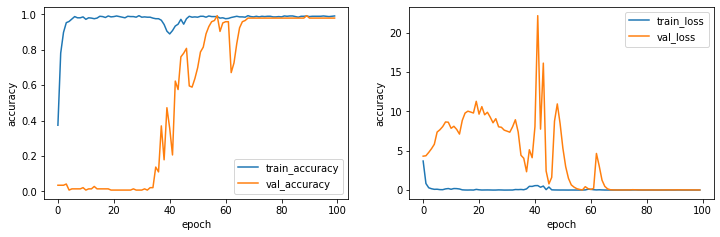

In [ ]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

/content/drive/MyDrive/Colab Notebooks/TEST
1/1 [==============================] - 0s 27ms/step
actual:GSL T.jpg
 Predicted:ASL D


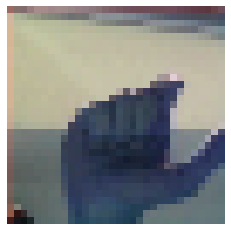

ASL T.jpg


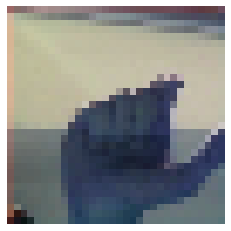

ISL T.jpg


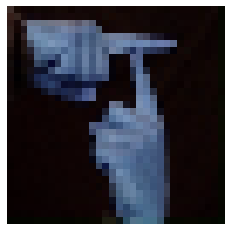

1/1 [==============================] - 0s 38ms/step
actual:GSL W.jpg
 Predicted:ASL D


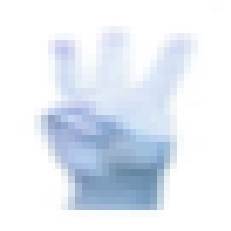

ASL W.jpg


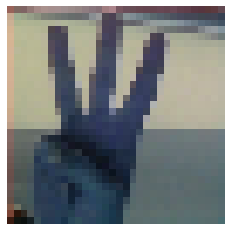

ISL W.jpg


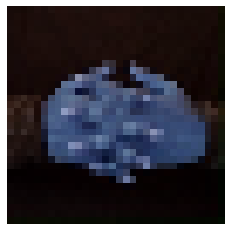

1/1 [==============================] - 0s 25ms/step
actual:GSL U.jpg
 Predicted:ASL D


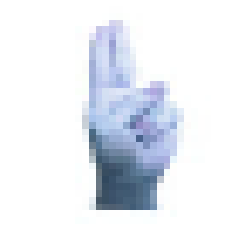

ASL U.jpg


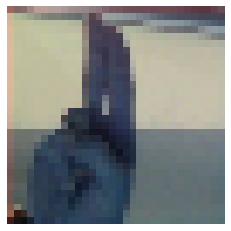

ISL U.jpg


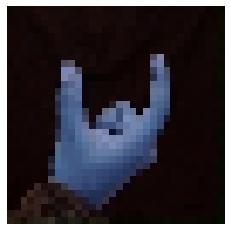

1/1 [==============================] - 0s 24ms/step
actual:GSL V.jpg
 Predicted:ASL D


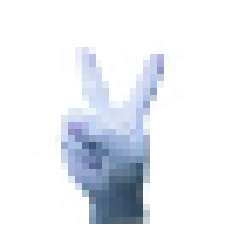

ASL V.jpg


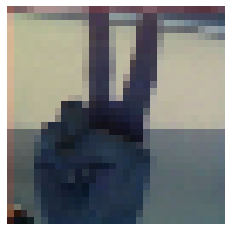

ISL V.jpg


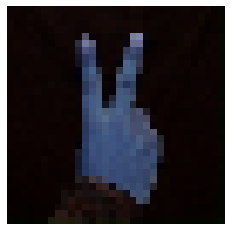

1/1 [==============================] - 0s 24ms/step
actual:GSL S.jpg
 Predicted:ASL G


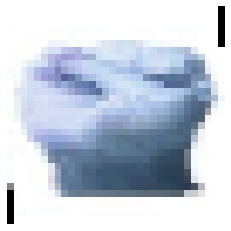

ASL S.jpg


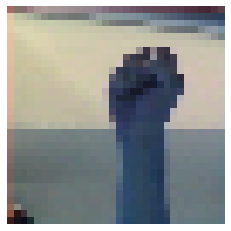

ISL S.jpg


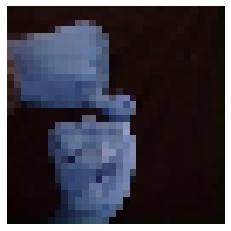

1/1 [==============================] - 0s 26ms/step
actual:GSL R.jpg
 Predicted:ASL D


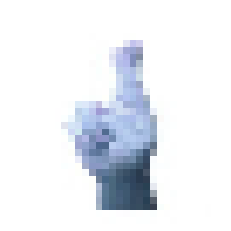

ASL R.jpg


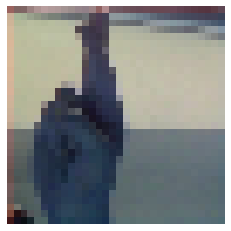

ISL R.jpg


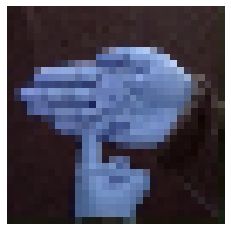

1/1 [==============================] - 0s 24ms/step
actual:GSL P.jpg
 Predicted:ASL G


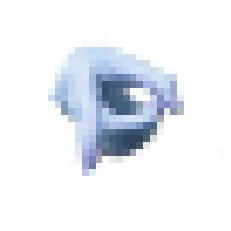

ASL P.jpg


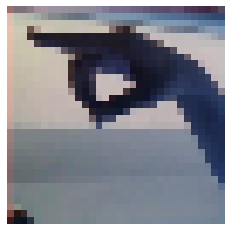

ISL P.jpg


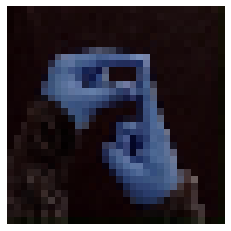

1/1 [==============================] - 0s 27ms/step
actual:GSL X.jpg
 Predicted:ASL G


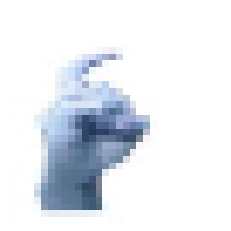

ASL X.jpg


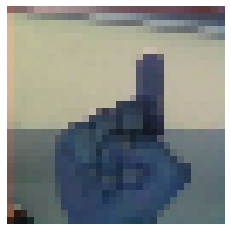

ISL X.jpg


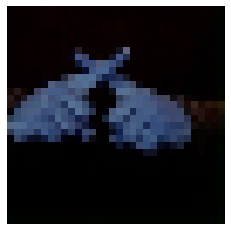

1/1 [==============================] - 0s 26ms/step
actual:GSL Q.jpg
 Predicted:ASL G


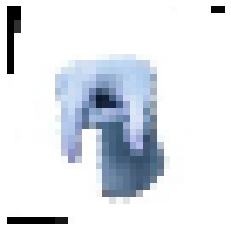

ASL Q.jpg


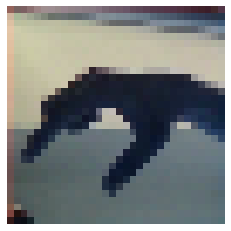

ISL Q.jpg


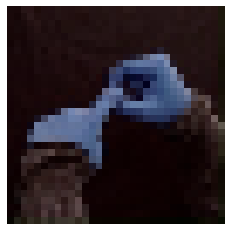

1/1 [==============================] - 0s 22ms/step
actual:GSL O.jpg
 Predicted:ASL G


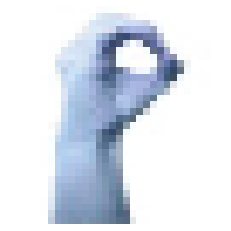

ASL O.jpg


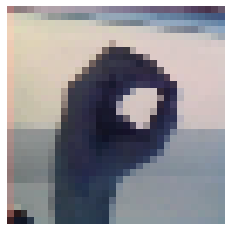

ISL O.jpg


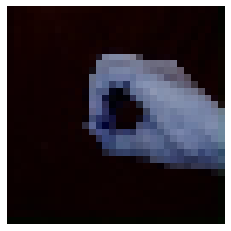

1/1 [==============================] - 0s 28ms/step
actual:GSL G.jpg
 Predicted:GSL Q


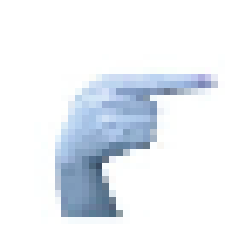

ASL G.jpg


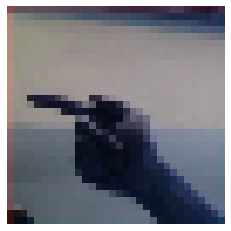

ISL G.jpg


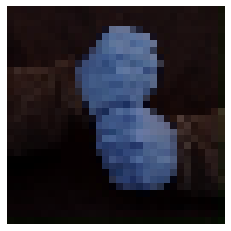

1/1 [==============================] - 0s 27ms/step
actual:GSL N.jpg
 Predicted:ASL G


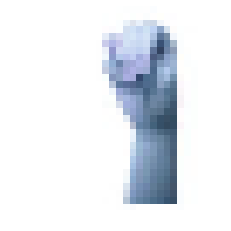

ASL N.jpg


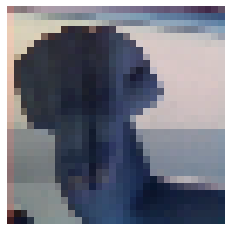

ISL N.jpg


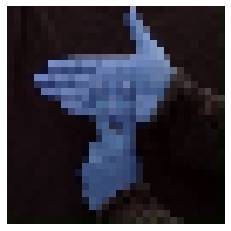

1/1 [==============================] - 0s 24ms/step
actual:GSL E.jpg
 Predicted:ASL G


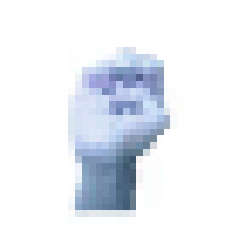

ASL E.jpg


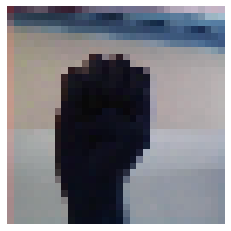

ISL E.jpg


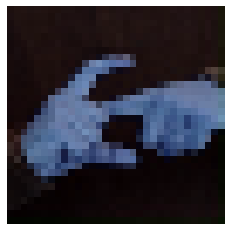

1/1 [==============================] - 0s 22ms/step
actual:GSL M.jpg
 Predicted:ASL G


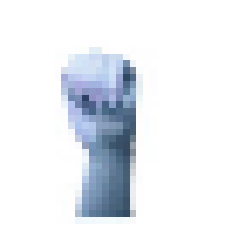

ASL M.jpg


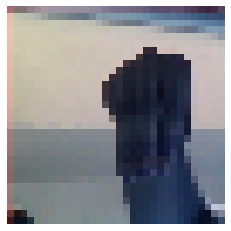

ISL M.jpg


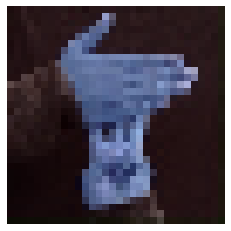

1/1 [==============================] - 0s 24ms/step
actual:GSL L.jpg
 Predicted:ASL G


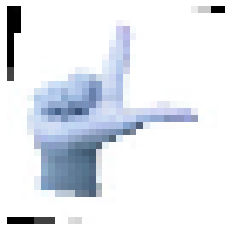

ASL L.jpg


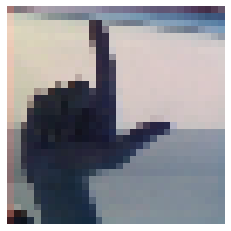

ISL L.jpg


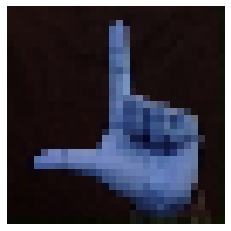

1/1 [==============================] - 0s 31ms/step
actual:GSL K.jpg
 Predicted:ASL D


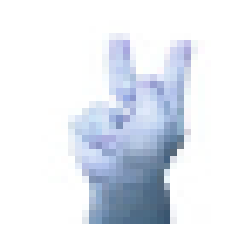

ASL K.jpg


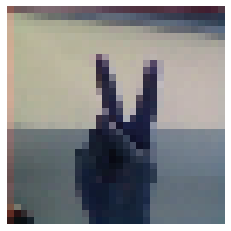

ISL K.jpg


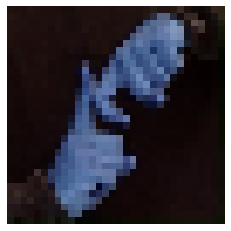

1/1 [==============================] - 0s 23ms/step
actual:GSL H.jpg
 Predicted:ASL G


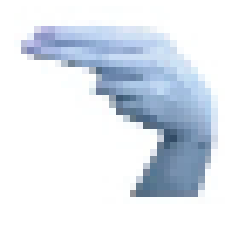

ASL H.jpg


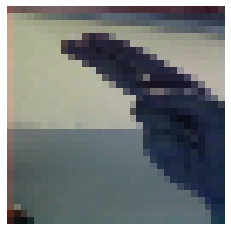

ISL H.jpg


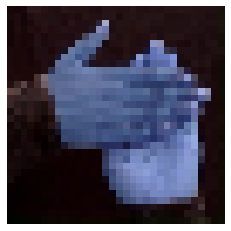

1/1 [==============================] - 0s 24ms/step
actual:GSL I.jpg
 Predicted:ASL D


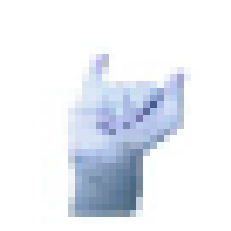

ASL I.jpg


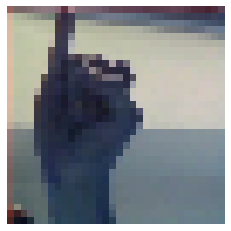

ISL I.jpg


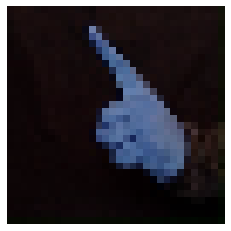

1/1 [==============================] - 0s 23ms/step
actual:GSL J.jpg
 Predicted:ASL G


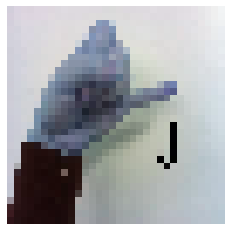

ASL J.jpg


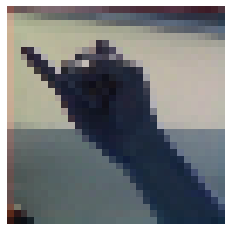

ISL J.jpg


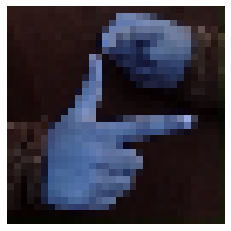

1/1 [==============================] - 0s 24ms/step
actual:GSL F.jpg
 Predicted:ASL G


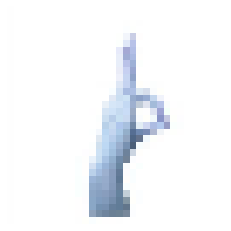

ASL F.jpg


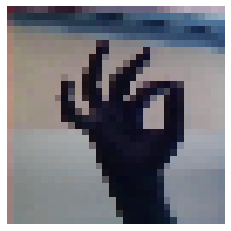

ISL F.jpg


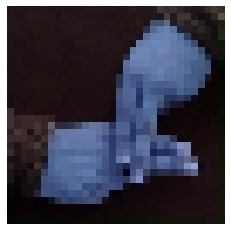

1/1 [==============================] - 0s 27ms/step
actual:GSL D.jpg
 Predicted:ASL G


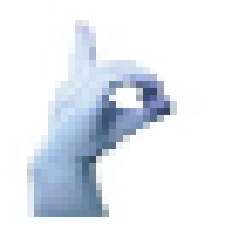

ASL D.jpg


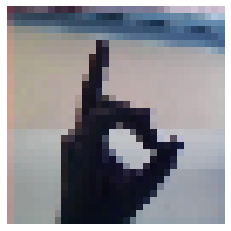

ISL D.jpg


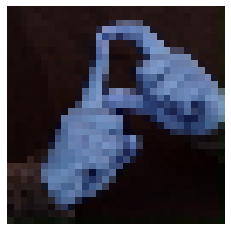

1/1 [==============================] - 0s 26ms/step
actual:GSL C.jpg
 Predicted:ASL G


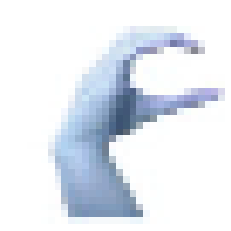

ASL C.jpg


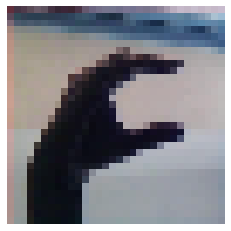

ISL C.jpg


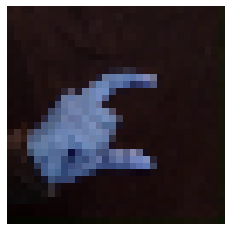

1/1 [==============================] - 0s 25ms/step
actual:GSL A.jpg
 Predicted:ASL G


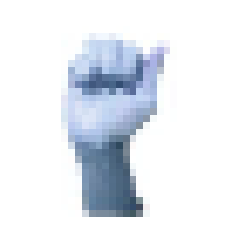

ASL A.jpg


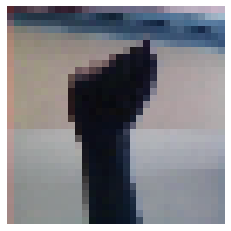

ISL A.jpg


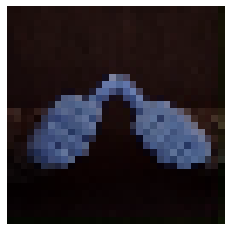

1/1 [==============================] - 0s 23ms/step
actual:ASL X.jpg
 Predicted:ASL G


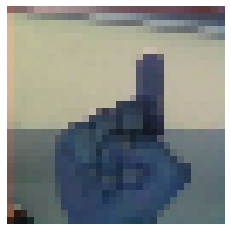

GSL X.jpg


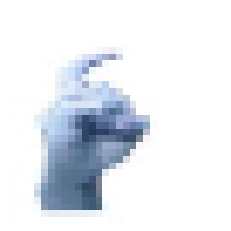

ISL X.jpg


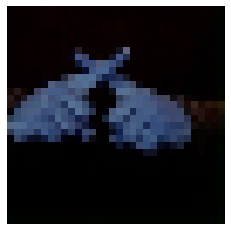

1/1 [==============================] - 0s 23ms/step
actual:GSL B.jpg
 Predicted:ASL D


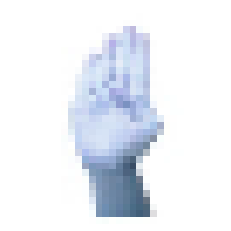

ASL B.jpg


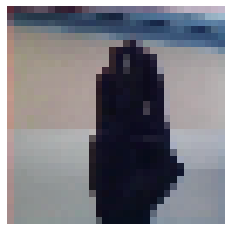

ISL B.jpg


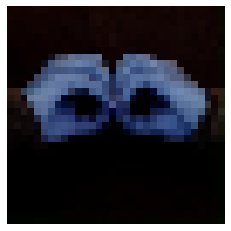

1/1 [==============================] - 0s 28ms/step
actual:ASL Z.jpg
 Predicted:ASL G


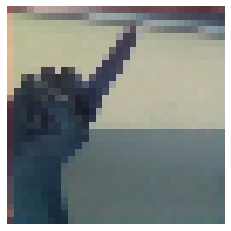

GSL Z.jpg


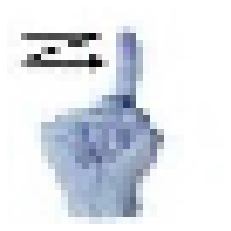

ISL Z.jpg


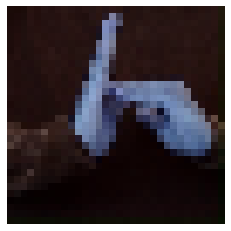

1/1 [==============================] - 0s 25ms/step
actual:ASL V.jpg
 Predicted:ASL G


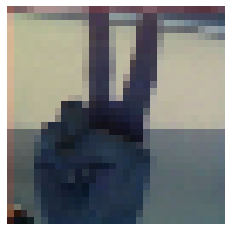

GSL V.jpg


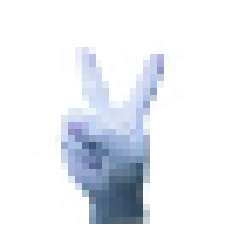

ISL V.jpg


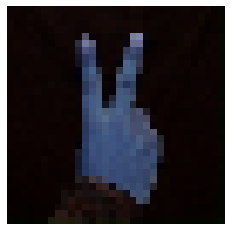

1/1 [==============================] - 0s 26ms/step
actual:ASL W.jpg
 Predicted:ASL G


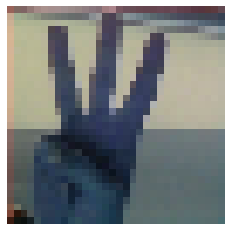

GSL W.jpg


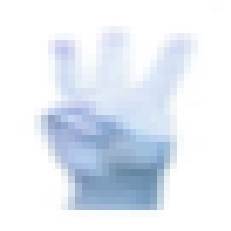

ISL W.jpg


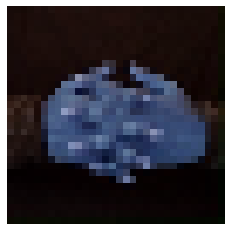

1/1 [==============================] - 0s 27ms/step
actual:ASL Y.jpg
 Predicted:ASL G


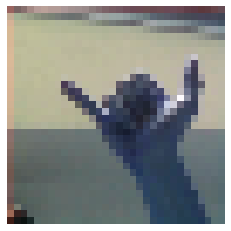

GSL Y.jpg


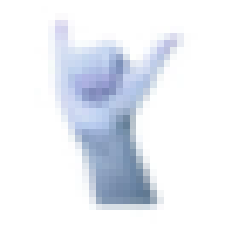

ISL Y.jpg


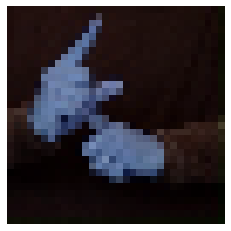

1/1 [==============================] - 0s 24ms/step
actual:ASL Q.jpg
 Predicted:ASL G


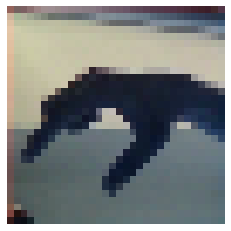

GSL Q.jpg


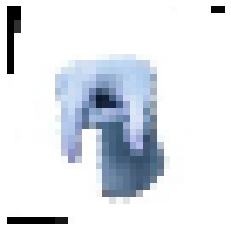

ISL Q.jpg


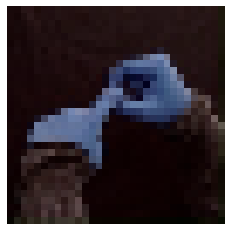

1/1 [==============================] - 0s 25ms/step
actual:ASL R.jpg
 Predicted:ASL G


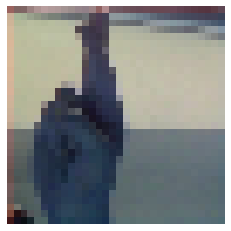

GSL R.jpg


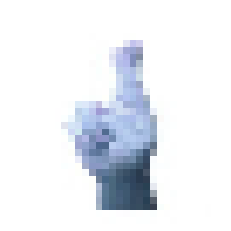

ISL R.jpg


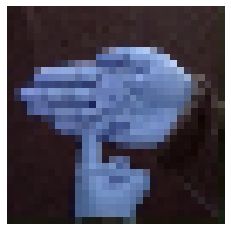

1/1 [==============================] - 0s 22ms/step
actual:ASL M.jpg
 Predicted:ASL G


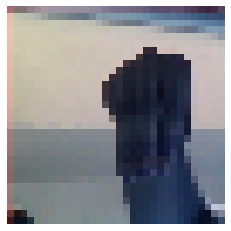

GSL M.jpg


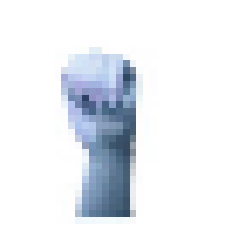

ISL M.jpg


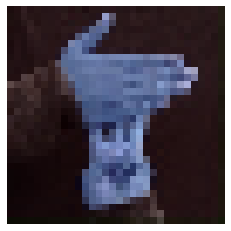

1/1 [==============================] - 0s 28ms/step
actual:ASL T.jpg
 Predicted:ASL D


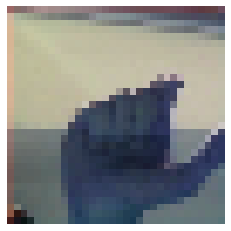

GSL T.jpg


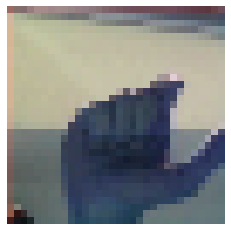

ISL T.jpg


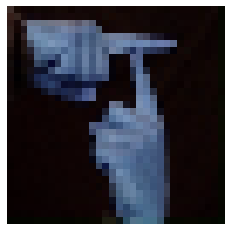

1/1 [==============================] - 0s 22ms/step
actual:ASL L.jpg
 Predicted:ASL G


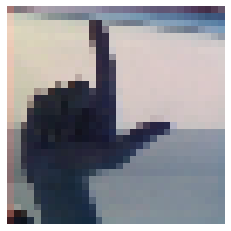

GSL L.jpg


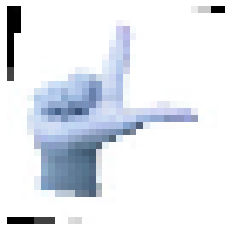

ISL L.jpg


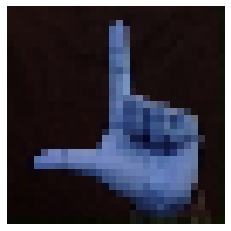

1/1 [==============================] - 0s 25ms/step
actual:ASL N.jpg
 Predicted:ASL G


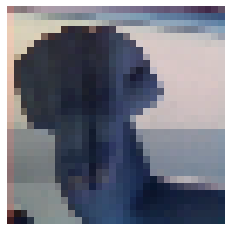

GSL N.jpg


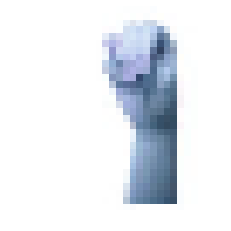

ISL N.jpg


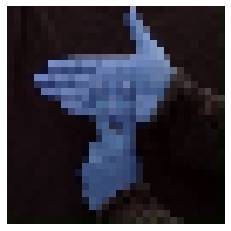

1/1 [==============================] - 0s 28ms/step
actual:ASL O.jpg
 Predicted:ASL G


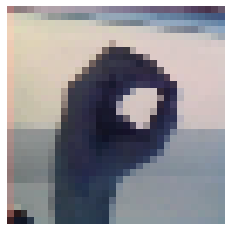

GSL O.jpg


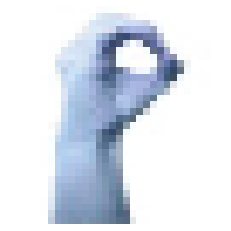

ISL O.jpg


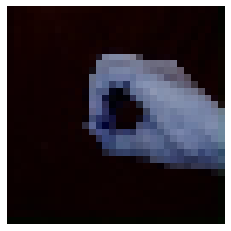

1/1 [==============================] - 0s 26ms/step
actual:ASL S.jpg
 Predicted:ASL G


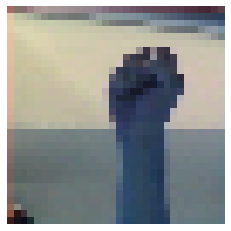

GSL S.jpg


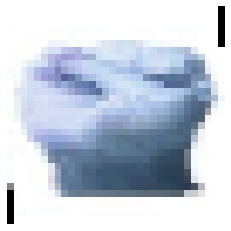

ISL S.jpg


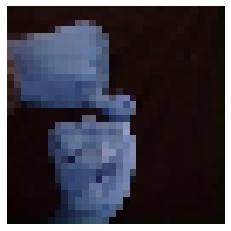

1/1 [==============================] - 0s 32ms/step
actual:ASL P.jpg
 Predicted:ASL G


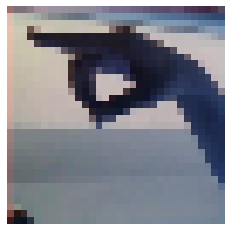

GSL P.jpg


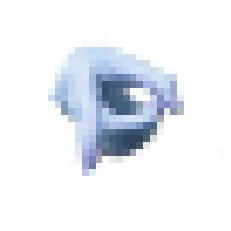

ISL P.jpg


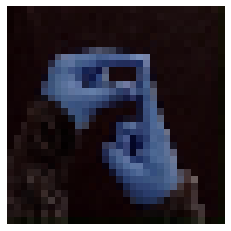

1/1 [==============================] - 0s 23ms/step
actual:ASL U.jpg
 Predicted:ASL G


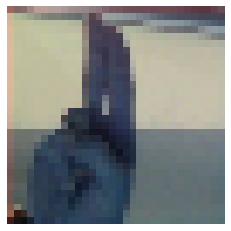

GSL U.jpg


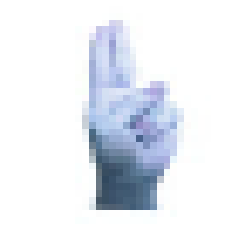

ISL U.jpg


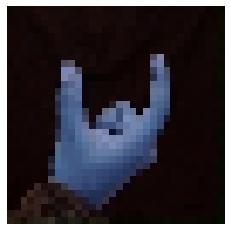

1/1 [==============================] - 0s 25ms/step
actual:ASL A.jpg
 Predicted:ASL G


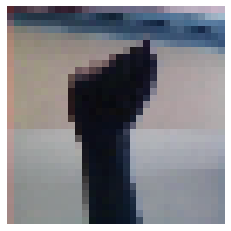

GSL A.jpg


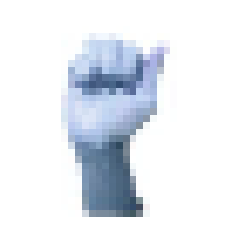

ISL A.jpg


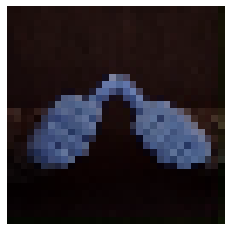

1/1 [==============================] - 0s 26ms/step
actual:ASL F.jpg
 Predicted:ASL G


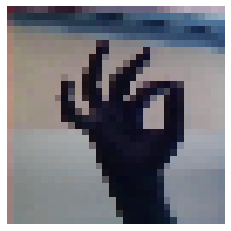

GSL F.jpg


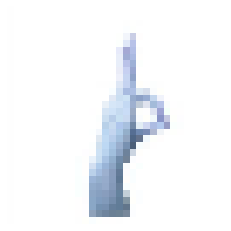

ISL F.jpg


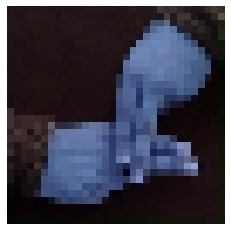

1/1 [==============================] - 0s 23ms/step
actual:ASL B.jpg
 Predicted:ASL G


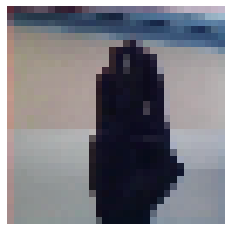

GSL B.jpg


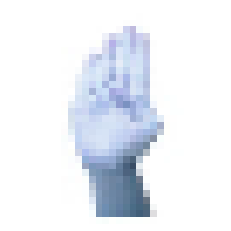

ISL B.jpg


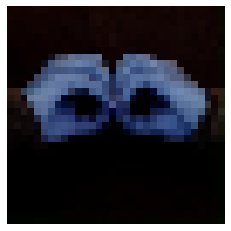

1/1 [==============================] - 0s 24ms/step
actual:ASL G.jpg
 Predicted:ASL D


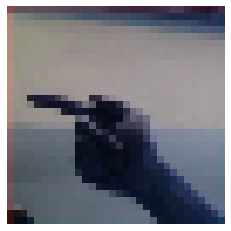

GSL G.jpg


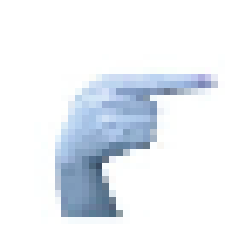

ISL G.jpg


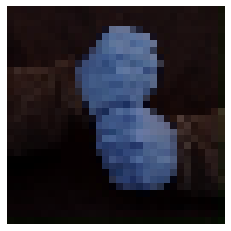

1/1 [==============================] - 0s 24ms/step
actual:ASL C.jpg
 Predicted:ASL G


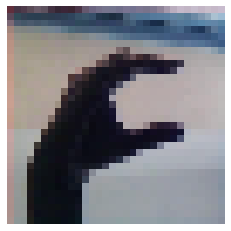

GSL C.jpg


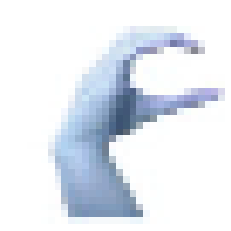

ISL C.jpg


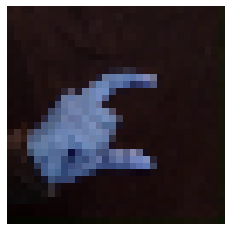

1/1 [==============================] - 0s 32ms/step
actual:ASL D.jpg
 Predicted:ASL G


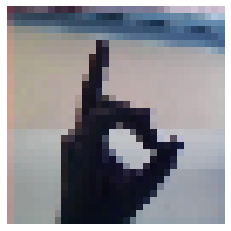

GSL D.jpg


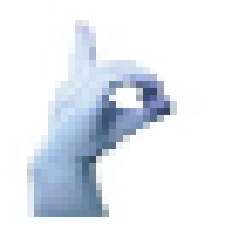

ISL D.jpg


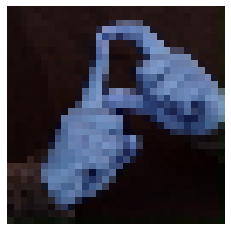

1/1 [==============================] - 0s 30ms/step
actual:ASL E.jpg
 Predicted:ASL G


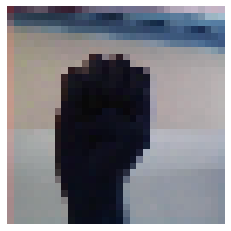

GSL E.jpg


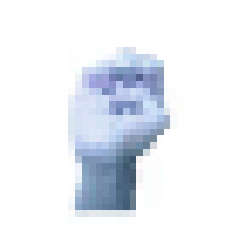

ISL E.jpg


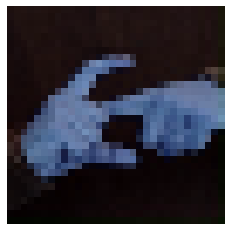

1/1 [==============================] - 0s 27ms/step
actual:ASL I.jpg
 Predicted:ASL G


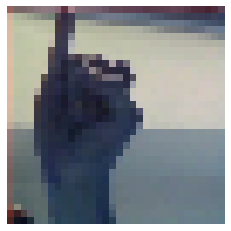

GSL I.jpg


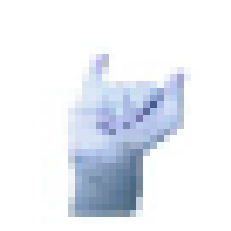

ISL I.jpg


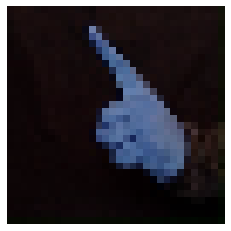

1/1 [==============================] - 0s 27ms/step
actual:ASL H.jpg
 Predicted:ASL G


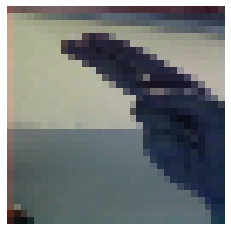

GSL H.jpg


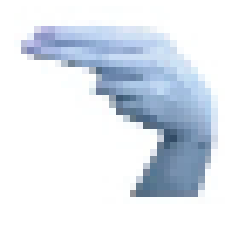

ISL H.jpg


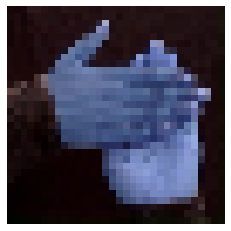

1/1 [==============================] - 0s 26ms/step
actual:ASL J.jpg
 Predicted:ASL G


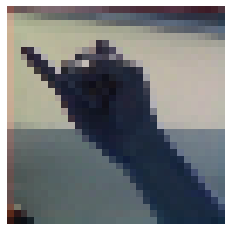

GSL J.jpg


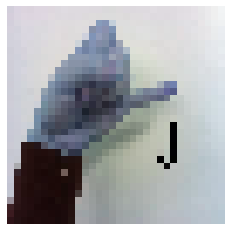

ISL J.jpg


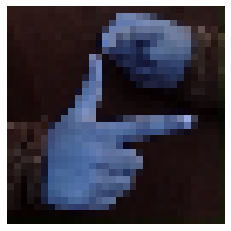

1/1 [==============================] - 0s 24ms/step
actual:ASL K.jpg
 Predicted:ASL G


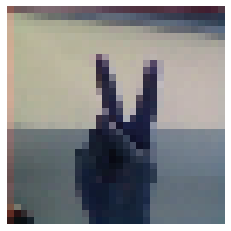

GSL K.jpg


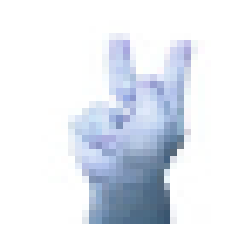

ISL K.jpg


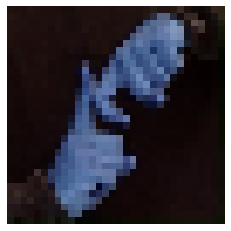

1/1 [==============================] - 0s 25ms/step
actual:ISL Z.jpg
 Predicted:ASL G


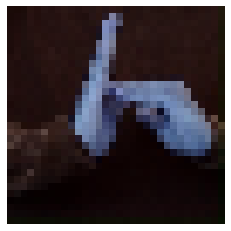

GSL Z.jpg


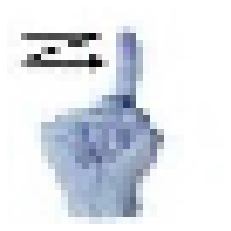

ASL Z.jpg


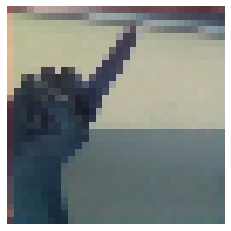

1/1 [==============================] - 0s 29ms/step
actual:ISL Y.jpg
 Predicted:ASL G


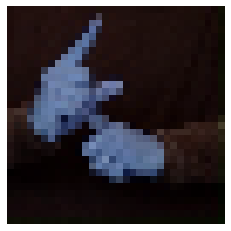

GSL Y.jpg


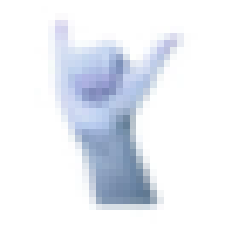

ASL Y.jpg


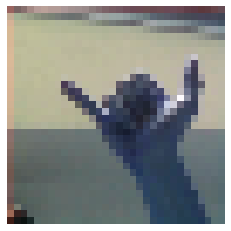

1/1 [==============================] - 0s 26ms/step
actual:ISL X.jpg
 Predicted:ASL G


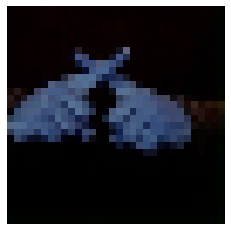

GSL X.jpg


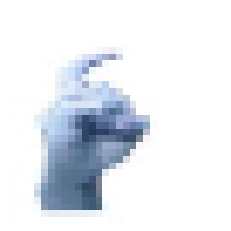

ASL X.jpg


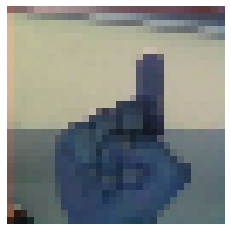

1/1 [==============================] - 0s 24ms/step
actual:ISL W.jpg
 Predicted:ASL G


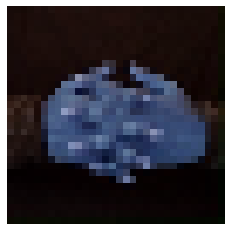

GSL W.jpg


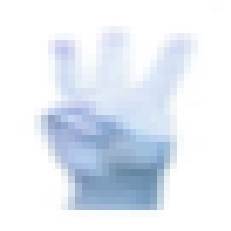

ASL W.jpg


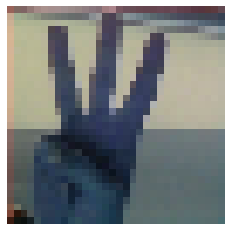

1/1 [==============================] - 0s 23ms/step
actual:ISL L.jpg
 Predicted:ASL G


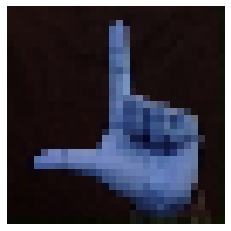

GSL L.jpg


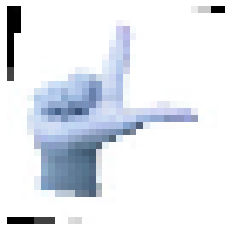

ASL L.jpg


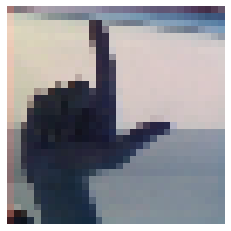

1/1 [==============================] - 0s 22ms/step
actual:ISL Q.jpg
 Predicted:ASL G


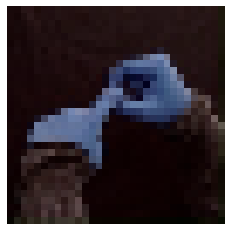

GSL Q.jpg


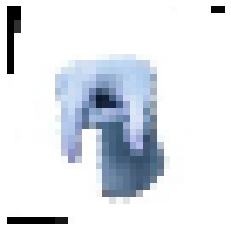

ASL Q.jpg


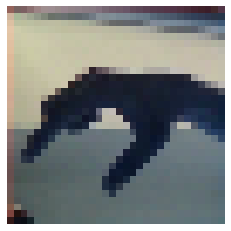

1/1 [==============================] - 0s 30ms/step
actual:ISL M.jpg
 Predicted:ASL G


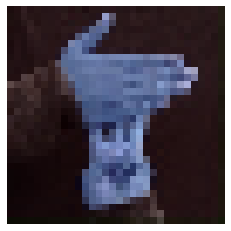

GSL M.jpg


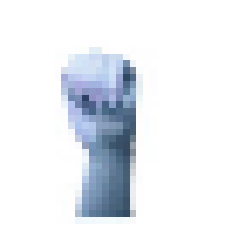

ASL M.jpg


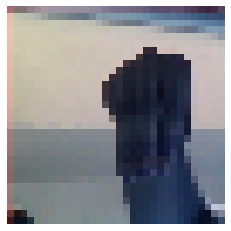

1/1 [==============================] - 0s 24ms/step
actual:ISL R.jpg
 Predicted:ASL G


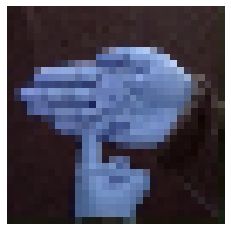

GSL R.jpg


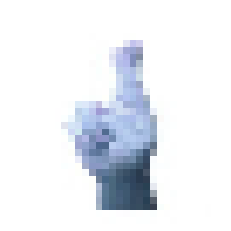

ASL R.jpg


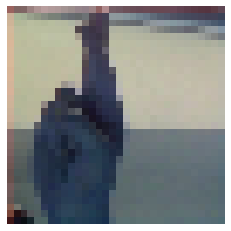

1/1 [==============================] - 0s 28ms/step
actual:ISL N.jpg
 Predicted:ASL G


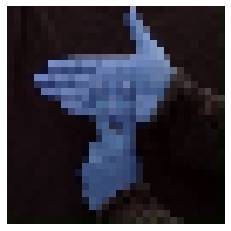

GSL N.jpg


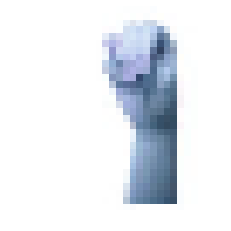

ASL N.jpg


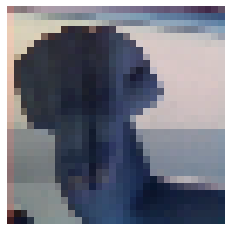

1/1 [==============================] - 0s 27ms/step
actual:ISL S.jpg
 Predicted:ASL G


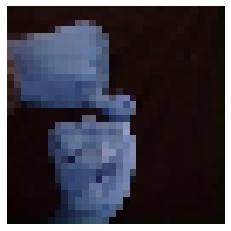

GSL S.jpg


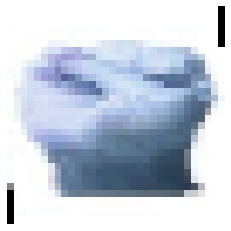

ASL S.jpg


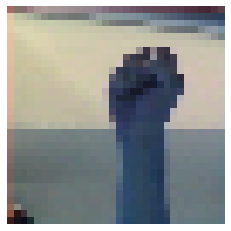

1/1 [==============================] - 0s 30ms/step
actual:ISL O.jpg
 Predicted:ASL G


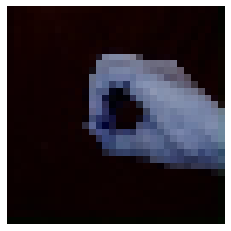

GSL O.jpg


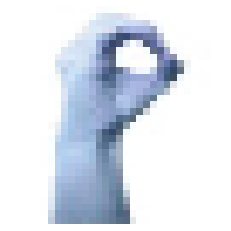

ASL O.jpg


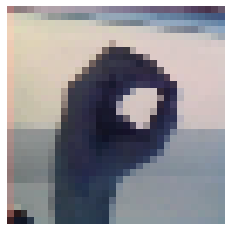

1/1 [==============================] - 0s 26ms/step
actual:ISL P.jpg
 Predicted:ASL G


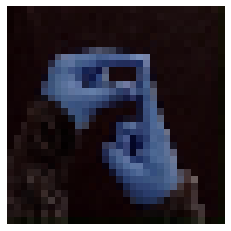

GSL P.jpg


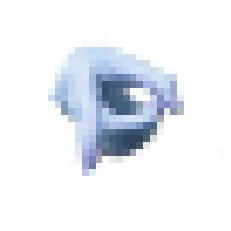

ASL P.jpg


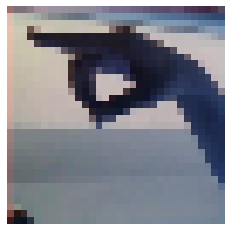

1/1 [==============================] - 0s 26ms/step
actual:ISL V.jpg
 Predicted:ASL G


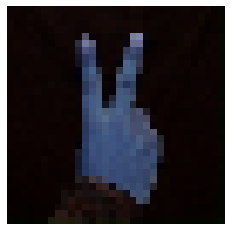

GSL V.jpg


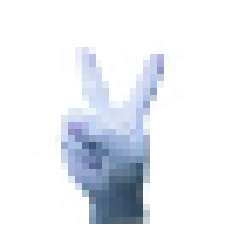

ASL V.jpg


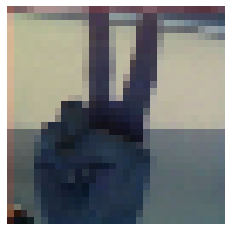

1/1 [==============================] - 0s 23ms/step
actual:ISL U.jpg
 Predicted:ASL G


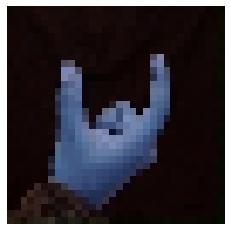

GSL U.jpg


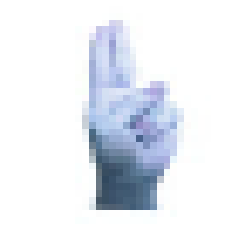

ASL U.jpg


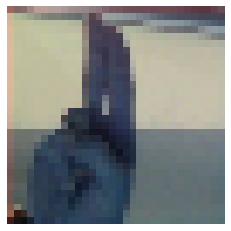

1/1 [==============================] - 0s 23ms/step
actual:ISL T.jpg
 Predicted:ASL G


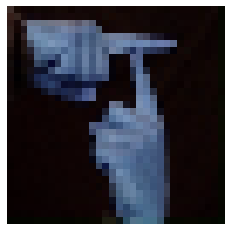

GSL T.jpg


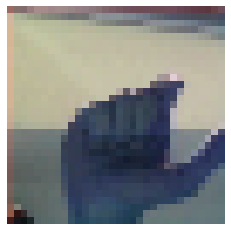

ASL T.jpg


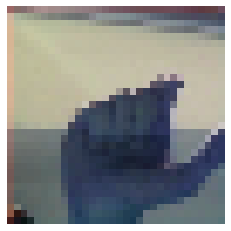

1/1 [==============================] - 0s 27ms/step
actual:ISL K.jpg
 Predicted:ASL G


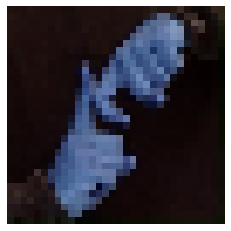

GSL K.jpg


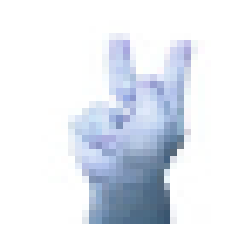

ASL K.jpg


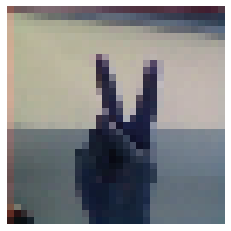

1/1 [==============================] - 0s 22ms/step
actual:ISL J.jpg
 Predicted:ASL G


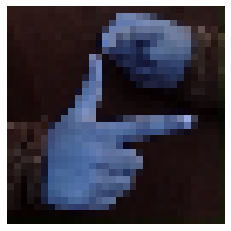

GSL J.jpg


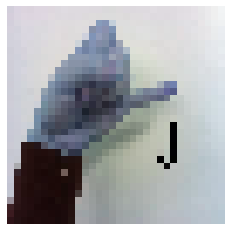

ASL J.jpg


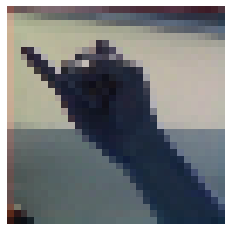

1/1 [==============================] - 0s 26ms/step
actual:ISL C.jpg
 Predicted:ASL G


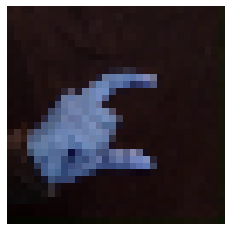

GSL C.jpg


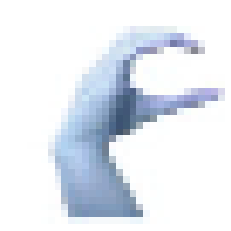

ASL C.jpg


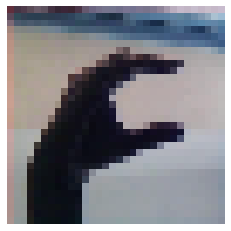

1/1 [==============================] - 0s 22ms/step
actual:ISL A.jpg
 Predicted:ASL G


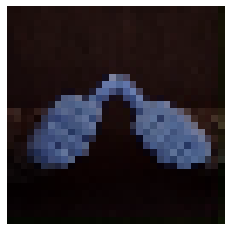

GSL A.jpg


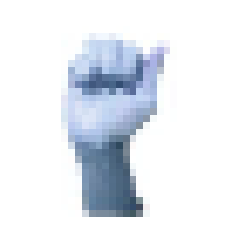

ASL A.jpg


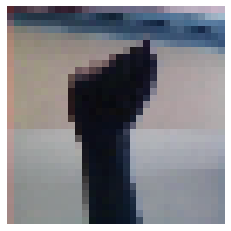

1/1 [==============================] - 0s 24ms/step
actual:ISL G.jpg
 Predicted:ASL G


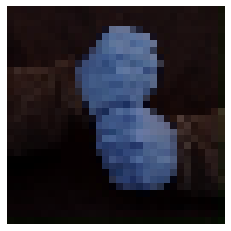

GSL G.jpg


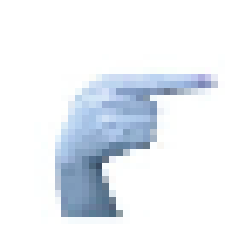

ASL G.jpg


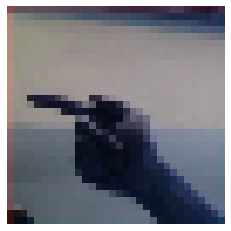

1/1 [==============================] - 0s 26ms/step
actual:ISL D.jpg
 Predicted:ASL G


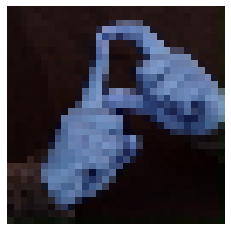

GSL D.jpg


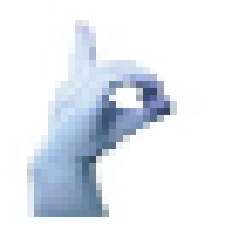

ASL D.jpg


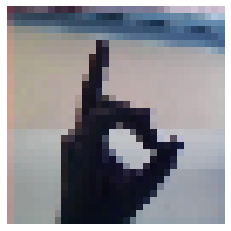

1/1 [==============================] - 0s 24ms/step
actual:ISL E.jpg
 Predicted:ASL G


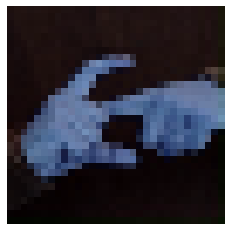

GSL E.jpg


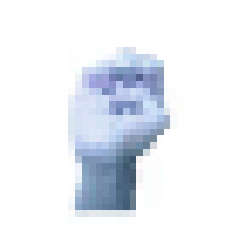

ASL E.jpg


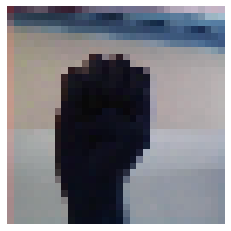

1/1 [==============================] - 0s 23ms/step
actual:ISL B.jpg
 Predicted:ASL G


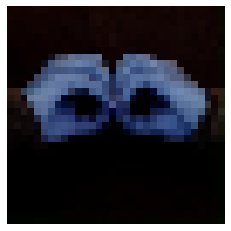

GSL B.jpg


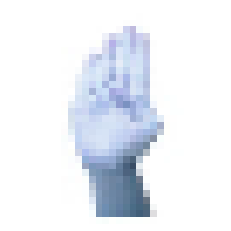

ASL B.jpg


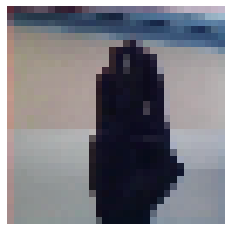

1/1 [==============================] - 0s 24ms/step
actual:ISL F.jpg
 Predicted:ASL G


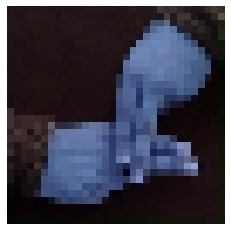

GSL F.jpg


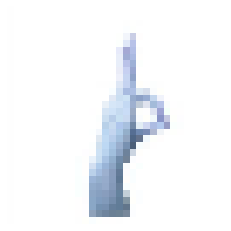

ASL F.jpg


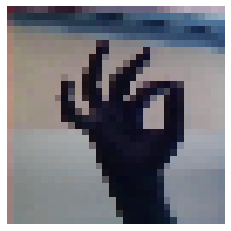

1/1 [==============================] - 0s 24ms/step
actual:GSL Z.jpg
 Predicted:ASL G


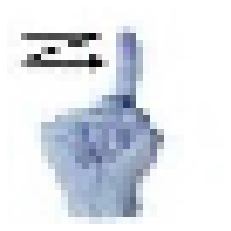

ASL Z.jpg


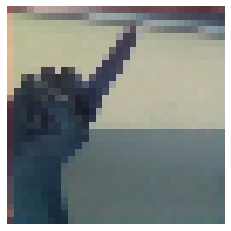

ISL Z.jpg


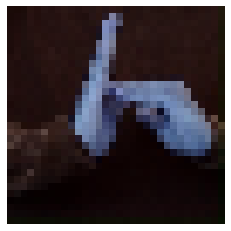

1/1 [==============================] - 0s 23ms/step
actual:ISL I.jpg
 Predicted:ASL G


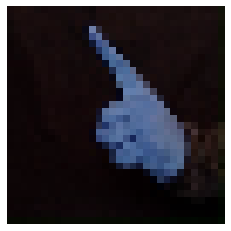

GSL I.jpg


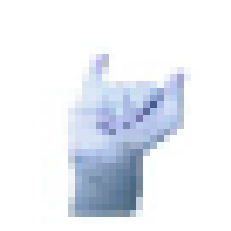

ASL I.jpg


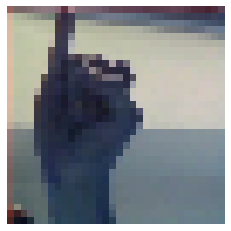

1/1 [==============================] - 0s 23ms/step
actual:ISL H.jpg
 Predicted:ASL G


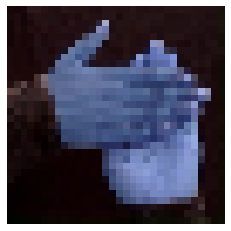

GSL H.jpg


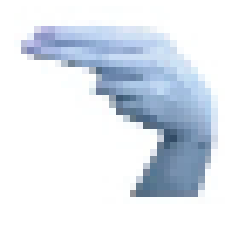

ASL H.jpg


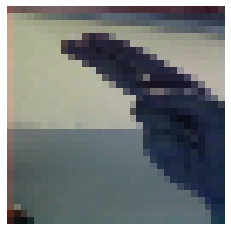

1/1 [==============================] - 0s 24ms/step
actual:GSL Y.jpg
 Predicted:ASL G


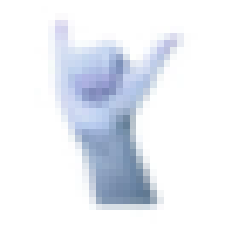

ASL Y.jpg


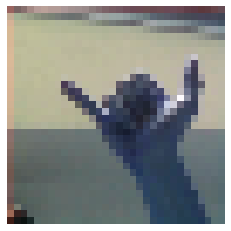

ISL Y.jpg


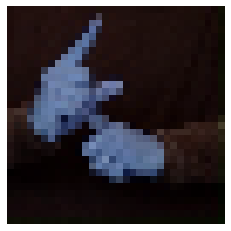

In [ ]:
print(test_dir)
l1=['GSL','ASL','ISL']
for i, test_image in enumerate(os.listdir(test_dir)):
    image_location = test_dir + '/' + test_image
    actual1 = test_image.split('_')
    img = cv2.imread(image_location)
    img = cv2.resize(img, (32, 32))
    plt.figure()
    plt.axis('Off')
    plt.imshow(img)
    img = np.array(img) / 255
    img = img.reshape((1, 32, 32, 3))
    img = data_generator.standardize(img)
    prediction = np.array(model.predict(img))
    actual=actual1[0] + ' ' + actual1[1]
    predicted =prediction.argmax()
    predicted = classes[predicted]
    predicted= predicted.split('_')
    predicted=predicted[0] + ' ' + predicted[1]
    print('actual:{}\n Predicted:{}'.format(actual,predicted))
    plt.show()
    for m in l1:
      if m==actual1[0]:
        continue
      else:
        print(m + ' ' + actual1[1])
        location=test_dir + '/' + m+ '_' + actual1[1]
        img1 = cv2.imread(location)
        img1 = cv2.resize(img1, (32, 32))
        plt.figure()
        plt.axis('Off')
        plt.imshow(img1)
        img1 = np.array(img1) / 255
        img1 = img1.reshape((1, 32, 32, 3))
        plt.show()